# DATA UNDERSTANDING

In [1]:
#importing the relevant libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

from sklearn.compose import ColumnTransformer

#!pip install shap
#import shap 
#shap.initjs()

#import six
#import sys
#sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

#import folium 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import our datasete 
crashes_data = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
people_dataset = pd.read_csv('Traffic_Crashes_-_People.csv')

In [3]:
#making an observation of tha crashes dataset outlook
crashes_data.head(5)

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14.0,2.0,3.0,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30.0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8.0,4.0,9.0,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30.0,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0.0,6.0,7.0,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,NaN,08/29/2022 11:30:00 AM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,11.0,2.0,8.0,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18.0,6.0,7.0,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)


In [4]:
#observing the first 5 rows on the people data
people_dataset.head(5)

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [5]:
#observing the shape of the crashes dataset
crashes_data.shape

(216969, 49)

In [6]:
#getting the shape pf the people dataset
people_dataset.shape

(1518890, 30)

In [7]:
#general description of the crashes data
crashes_data.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,216965.000000,62635.000000,216964.000000,216961.000000,216964.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.0,216964.000000,216964.000000,216964.000000,215477.000000,215477.000000
mean,28.344765,9.480961,3683.588909,1239.076991,2.034273,0.186979,0.001224,0.019909,0.105100,0.060746,2.003321,0.0,13.220944,4.124025,6.698268,41.854096,-87.672774
std,6.277091,1732.661806,2848.998700,704.981654,0.454870,0.559469,0.037638,0.162777,0.416915,0.317985,1.160133,0.0,5.560850,1.983865,3.321089,0.348189,0.709165
min,0.000000,0.000000,1.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000,1242.000000,713.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.780836,-87.721329
50%,30.000000,2.000000,3200.000000,1135.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874349,-87.673770
75%,30.000000,4.000000,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,41.923957,-87.633005
max,99.000000,433634.000000,34453.000000,2535.000000,18.000000,21.000000,3.000000,7.000000,21.000000,10.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [8]:
#LANE_CNT hase many missing values
'''some of the rows have outliers eg POSTED_SPEED_LIMIT, 
INJURIES_TOTAL, INJURIES_NON_INCAPACITATING, 
INJURIES_INCAPACITATING and INJURIES_NO_INDICATION .'''


'some of the rows have outliers eg POSTED_SPEED_LIMIT, \nINJURIES_TOTAL, INJURIES_NON_INCAPACITATING, \nINJURIES_INCAPACITATING and INJURIES_NO_INDICATION .'

In [9]:
#describing the people data
people_dataset.describe()

,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,1.489026e+06,307316.000000,1.077214e+06,1815.000000
mean,7.127840e+05,4.158706,3.784403e+01,0.169983
std,4.135316e+05,2.197610,1.709567e+01,0.103428
min,2.000000e+00,1.000000,-1.770000e+02,0.000000
25%,3.565312e+05,3.000000,2.500000e+01,0.120000
50%,7.064565e+05,3.000000,3.500000e+01,0.170000
75%,1.071197e+06,5.000000,5.000000e+01,0.220000
max,1.437588e+06,12.000000,1.100000e+02,1.000000


In [10]:
#we can see that most of the columns in the people_dateaset are cartegorical 
#lets do more investigation by checking the data types

In [11]:
#getting more information on the people data
people_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518890 entries, 0 to 1518889
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1518890 non-null  object 
 1   PERSON_TYPE            1518890 non-null  object 
 2   CRASH_RECORD_ID        1518890 non-null  object 
 3   RD_NO                  1509810 non-null  object 
 4   VEHICLE_ID             1489026 non-null  float64
 5   CRASH_DATE             1518890 non-null  object 
 6   SEAT_NO                307316 non-null   float64
 7   CITY                   1109111 non-null  object 
 8   STATE                  1123875 non-null  object 
 9   ZIPCODE                1013799 non-null  object 
 10  SEX                    1495127 non-null  object 
 11  AGE                    1077214 non-null  float64
 12  DRIVERS_LICENSE_STATE  892874 non-null   object 
 13  DRIVERS_LICENSE_CLASS  755249 non-null   object 
 14  SAFETY_EQUIPMENT  

In [12]:
#now it is clear a good number if the data in the peoplrs dataset are object types
#it is also clear the most of the columns have missing values

In [13]:
"""
from the information above it shows a clear indication the some of the rows in our datasets have very high percentage of
 null values, from this observation well dive deeper to ascertain by what precetage the datasete are populated with
 null values, we the set a threshold by which we eliminate the columns with high percentage of null values.
"""

'\nfrom the information above it shows a clear indication the some of the rows in our datasets have very high percentage of\n null values, from this observation well dive deeper to ascertain by what precetage the datasete are populated with\n null values, we the set a threshold by which we eliminate the columns with high percentage of null values.\n'

# DATA CLEANING

In [14]:
#checking the percentage of missing values in each column in tha person_dataset
nulls = people_dataset.isna().sum()
null_percent = nulls[nulls>0] / len(people_dataset)
null_percent.to_frame('% Null').style.background_gradient(cmap='magma')


,% Null
RD_NO,0.005978
VEHICLE_ID,0.019662
SEAT_NO,0.797671
CITY,0.269788
STATE,0.260068
ZIPCODE,0.332540
SEX,0.015645
AGE,0.290789
DRIVERS_LICENSE_STATE,0.412154
DRIVERS_LICENSE_CLASS,0.502763


In [15]:
'''
from the observation in the cmap
above we can see that a good number of the
columns have a very high percentage of values a null
from this observation ot is good to drop them on a reasonerble 
level
'''

'\nfrom the observation in the cmap\nabove we can see that a good number of the\ncolumns have a very high percentage of values a null\nfrom this observation ot is good to drop them on a reasonerble \nlevel\n'

In [16]:
#here we isolate the columns with high null percentage of 70 % and above
high_null = null_percent[null_percent>.70].index.tolist()
high_null


['SEAT_NO',
 'HOSPITAL',
 'EMS_AGENCY',
 'EMS_RUN_NO',
 'PEDPEDAL_ACTION',
 'PEDPEDAL_VISIBILITY',
 'PEDPEDAL_LOCATION',
 'BAC_RESULT VALUE',
 'CELL_PHONE_USE']

In [17]:
#checking if the data contains duplicates 
people_dataset.duplicated().sum()

0

In [18]:
#Now we can eliminate the columns from our dataset
people_dataset = people_dataset.drop(columns = high_null)
#checking if tha data has changed
print(people_dataset.shape)
#vew tha new data outlook
display(people_dataset.head())
#more cheking on the data changes
people_dataset.info()

(1518890, 21)


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,...,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,CHICAGO,IL,60651,M,...,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,CHICAGO,IL,60620,M,...,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,X,...,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN,UNKNOWN,TEST NOT OFFERED
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,X,...,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,X,...,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518890 entries, 0 to 1518889
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1518890 non-null  object 
 1   PERSON_TYPE            1518890 non-null  object 
 2   CRASH_RECORD_ID        1518890 non-null  object 
 3   RD_NO                  1509810 non-null  object 
 4   VEHICLE_ID             1489026 non-null  float64
 5   CRASH_DATE             1518890 non-null  object 
 6   CITY                   1109111 non-null  object 
 7   STATE                  1123875 non-null  object 
 8   ZIPCODE                1013799 non-null  object 
 9   SEX                    1495127 non-null  object 
 10  AGE                    1077214 non-null  float64
 11  DRIVERS_LICENSE_STATE  892874 non-null   object 
 12  DRIVERS_LICENSE_CLASS  755249 non-null   object 
 13  SAFETY_EQUIPMENT       1514565 non-null  object 
 14  AIRBAG_DEPLOYED   

In [19]:
#assesing the percentage of missing values in crush_data
#checking the percentage of missing values in each column in tha person_dataset
nulls = crashes_data.isna().sum()
null_percent_crashes = nulls[nulls>0] / len(crashes_data)
null_percent_crashes.to_frame('% Null').style.background_gradient(cmap='ocean')


,% Null
RD_NO,0.000018
CRASH_DATE_EST_I,0.922708
CRASH_DATE,0.000018
POSTED_SPEED_LIMIT,0.000018
TRAFFIC_CONTROL_DEVICE,0.000018
DEVICE_CONDITION,0.000018
WEATHER_CONDITION,0.000018
LIGHTING_CONDITION,0.000018
FIRST_CRASH_TYPE,0.000023
TRAFFICWAY_TYPE,0.000023


In [20]:
#from the above output it is clear taht there are also high percentag of null values in some of our data in the crashes dataset
#now will also get rid of the columns since keeping them will most likely not add any value to our data

In [21]:
#here we isolate the columns with high null percentage of 70 % and above
high_null_crashes = null_percent_crashes[null_percent_crashes>.70].index.tolist()
high_null_crashes


['CRASH_DATE_EST_I',
 'LANE_CNT',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'PHOTOS_TAKEN_I',
 'STATEMENTS_TAKEN_I',
 'DOORING_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I']

In [22]:
#Now we can eliminate the columns from our dataset
crashes_data = crashes_data.drop(columns = high_null_crashes)
#checking if tha data has changed
print(crashes_data.shape)
#vew tha new data outlook
display(crashes_data.head())
#more cheking on the data changes
crashes_data.info()

(216969, 39)


,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,0.0,1.0,2.0,0.0,14.0,2.0,3.0,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,09/05/2018 08:40:00 AM,30.0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,8.0,4.0,9.0,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,07/15/2022 12:45:00 AM,30.0,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,0.0,6.0,7.0,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,08/29/2022 11:30:00 AM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,0.0,0.0,3.0,0.0,11.0,2.0,8.0,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,07/15/2022 06:50:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,18.0,6.0,7.0,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216969 entries, 0 to 216968
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                216969 non-null  object 
 1   RD_NO                          216965 non-null  object 
 2   CRASH_DATE                     216965 non-null  object 
 3   POSTED_SPEED_LIMIT             216965 non-null  float64
 4   TRAFFIC_CONTROL_DEVICE         216965 non-null  object 
 5   DEVICE_CONDITION               216965 non-null  object 
 6   WEATHER_CONDITION              216965 non-null  object 
 7   LIGHTING_CONDITION             216965 non-null  object 
 8   FIRST_CRASH_TYPE               216964 non-null  object 
 9   TRAFFICWAY_TYPE                216964 non-null  object 
 10  ALIGNMENT                      216964 non-null  object 
 11  ROADWAY_SURFACE_COND           216964 non-null  object 
 12  ROAD_DEFECT                   

In [23]:
#now our datasete gas only one column with missing values 
#let evaluation and taking keen observation on the specific column

In [24]:
crashes_data['HIT_AND_RUN_I'].value_counts()

Y    64503
N     2903
Name: HIT_AND_RUN_I, dtype: int64

In [25]:
"""
this column is taking in boolien values, based on the nature of information contained in this column we cannot fill the 
empty rows by any of them it is therefore reasonerble to eliminate the column altogether
"""

'\nthis column is taking in boolien values, based on the nature of information contained in this column we cannot fill the \nempty rows by any of them it is therefore reasonerble to eliminate the column altogether\n'

In [26]:
#droping the hit and run column
crashes_data = crashes_data.drop(columns='HIT_AND_RUN_I', axis=1)

In [27]:
#cheking for the columns in the crashes data
crashes_data.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [28]:
#dropping MORE irrelevant columns
crashes_data= crashes_data.drop([ 'RD_NO', 'CRASH_DATE', 
                               'REPORT_TYPE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME',
                                'INJURIES_UNKNOWN', 'LATITUDE', 'LONGITUDE', 'LOCATION'], axis=1)


In [29]:
#checking if the data contains duplicates
crashes_data.duplicated().sum()

0

In [30]:
crashes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216969 entries, 0 to 216968
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                216969 non-null  object 
 1   POSTED_SPEED_LIMIT             216965 non-null  float64
 2   TRAFFIC_CONTROL_DEVICE         216965 non-null  object 
 3   DEVICE_CONDITION               216965 non-null  object 
 4   WEATHER_CONDITION              216965 non-null  object 
 5   LIGHTING_CONDITION             216965 non-null  object 
 6   FIRST_CRASH_TYPE               216964 non-null  object 
 7   TRAFFICWAY_TYPE                216964 non-null  object 
 8   ALIGNMENT                      216964 non-null  object 
 9   ROADWAY_SURFACE_COND           216964 non-null  object 
 10  ROAD_DEFECT                    216964 non-null  object 
 11  CRASH_TYPE                     216964 non-null  object 
 12  DAMAGE                        

# EDA

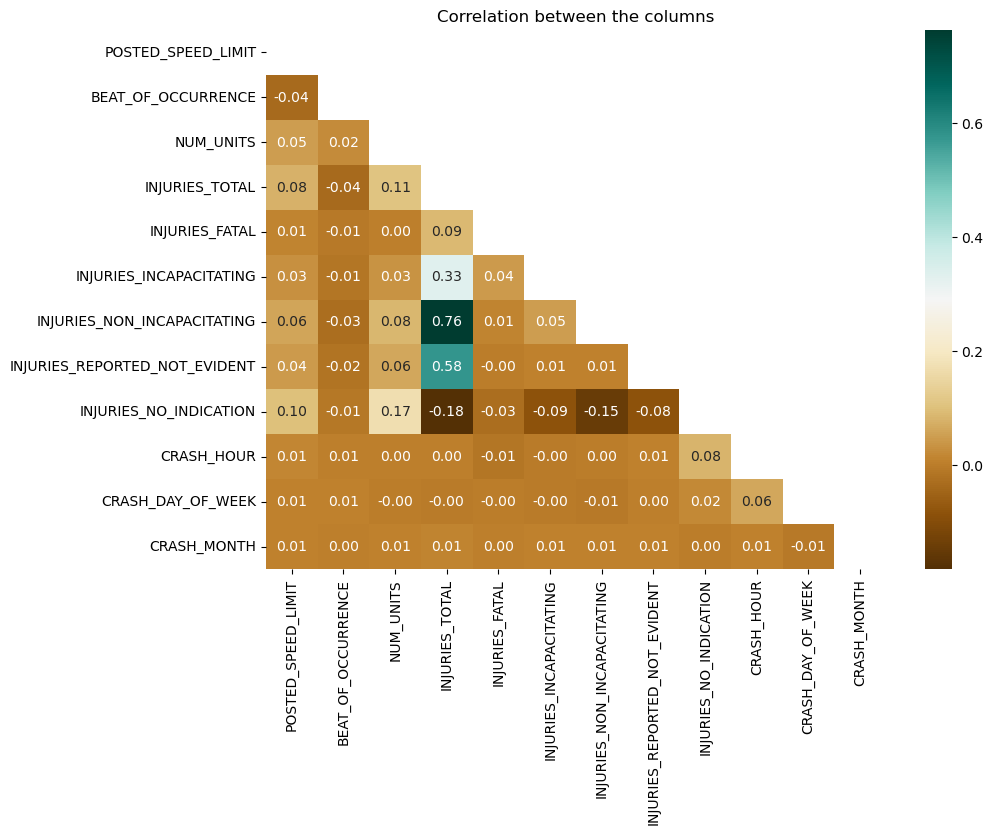

In [31]:
#correlation heatmap
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(crashes_data.corr(), dtype=bool))
sns.heatmap(crashes_data.corr(),annot=True,cmap="BrBG",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()


In [32]:
#inspecting values for columns
for col in crashes_data.columns:
    try:
        print(col, crashes_data[col].value_counts(dropna=False)[:10])
    except:
        print(col, crashes_data[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns


CRASH_RECORD_ID 79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d    1
186b23f29f3f717b244be4026bb26daed433f1fa4bdfbe753b48ec73adafd87ef6910c9eef75ff6e5a4460767d07980b3536725f1f6b7ca1cb4b09aa20c5892b    1
1a773ef5d30370d9e3cb48696fbb0a24bc010092a99161e070ce655fb63f0bbcbca780a1af810c65706f1750bf708eec3ff21fc3551f2489d2351a28bc652bcf    1
17b35d74eddd4447eb0ce162d4dc143374c37baa096d0c243183e385e9c8bdfb9fdeb9ff691e3870e35a931b9ce4cdb64c69640bb02e6cdafd2e7cf76f57b783    1
181c049e37950b3fa20b7f7f672759cb855cee529e16bd0a10313736834000c0aca74342d460e00e2d836899a4b4a135ea72f6fbe8e97f0c364d3c793b5a03e5    1
182ebcecfc720a1ae198bfe7f63cffd3e799b95910ebc02f373bd942898e125aa02ce7d975a7715240070e4aa0c9fa0d1bf575103e7ee2c962609e649568b571    1
1a50672d19726a97defc872ebc9390a19e4b9d720d2dc5c3f12cccc50583b51a637b0abaf515bf4a0a10752a50469fa815153d24ad91a9de61ffa67ec40da318    1
189e4cc914a2dcd33d85adc05d2770152d93d68b71d3aa

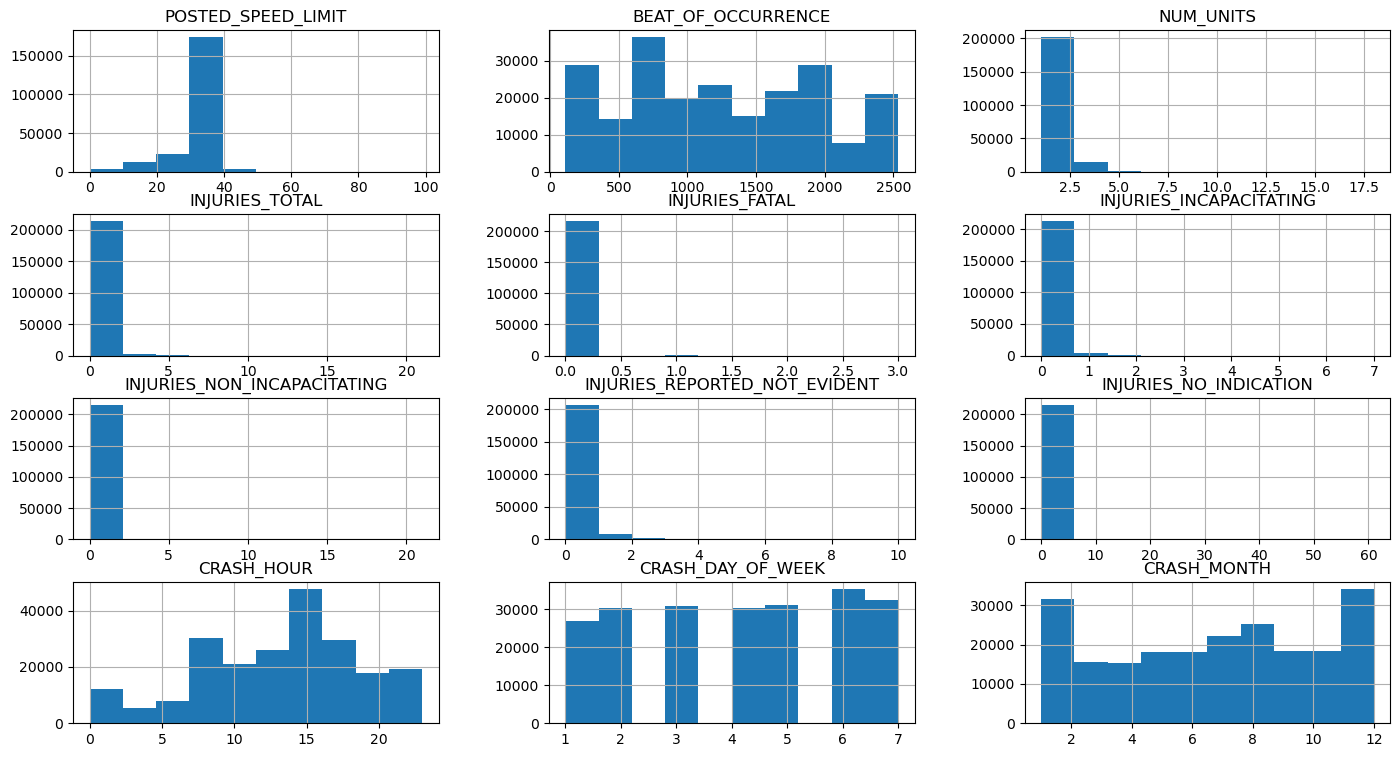

In [33]:
#cheking the distribution of numeric variables in the crashes data
# Numeric variables
crashes_data.hist(figsize=(17, 9));


In [34]:
"""
some of tha data is normal while other sets are non normal
"""

'\nsome of tha data is normal while other sets are non normal\n'

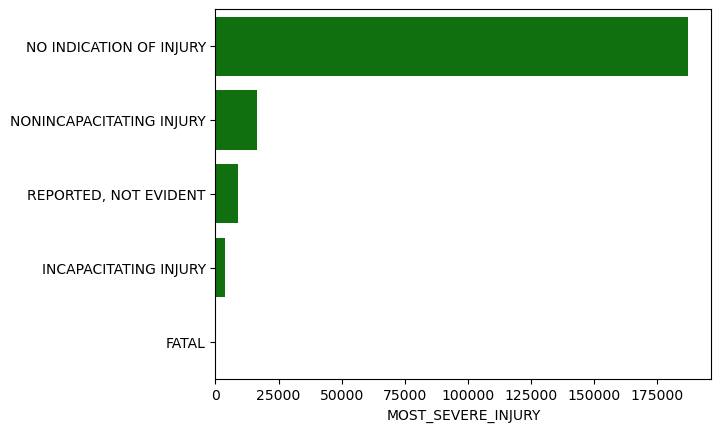

In [35]:
#a bar graph on the frequency of the categories of most severe injury
sns.barplot(y=crashes_data.MOST_SEVERE_INJURY.value_counts().index, x=crashes_data.MOST_SEVERE_INJURY.value_counts(),
           orient='h', color = 'g');

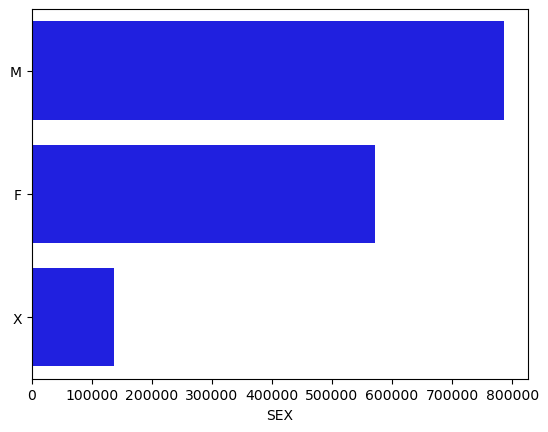

In [36]:
#assesing the gender that is most prone to accodents
sns.barplot(y=people_dataset.SEX.value_counts().index, x=people_dataset.SEX.value_counts(),
           orient='h', color = 'b');

In [37]:
pd.crosstab(people_dataset.SEX, people_dataset.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
SEX,,,,,
F,221,5929,509901,34484,21691
M,596,7715,722136,36942,19069
X,9,83,135845,229,131


In [38]:
"""
from the graph above we can see male is the leading gender involved in crashes
"""

'\nfrom the graph above we can see male is the leading gender involved in crashes\n'

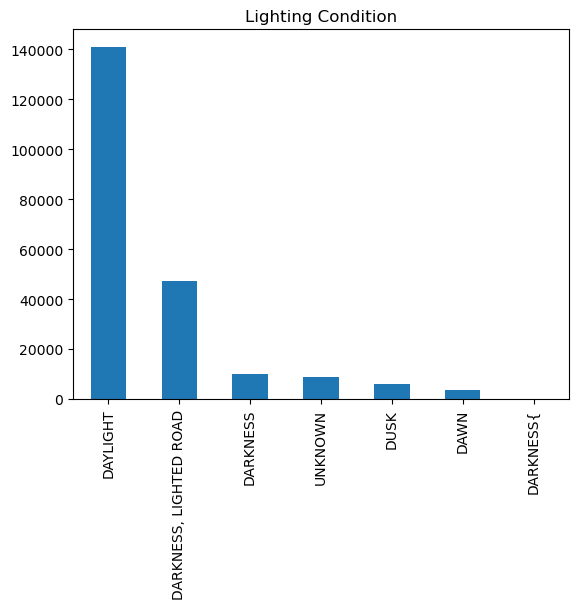

In [39]:
crashes_data.LIGHTING_CONDITION .value_counts().plot.bar()
plt.title("Lighting Condition");

In [40]:
pd.crosstab(crashes_data.LIGHTING_CONDITION, people_dataset.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
LIGHTING_CONDITION,,,,,
DARKNESS,3,104,9267,512,292
"DARKNESS, LIGHTED ROAD",33,490,42595,2610,1356
DARKNESS{,0,0,1,0,0
DAWN,4,38,3366,197,92
DAYLIGHT,107,1479,127582,7676,4013
DUSK,4,75,5579,313,182
UNKNOWN,9,84,8058,490,263


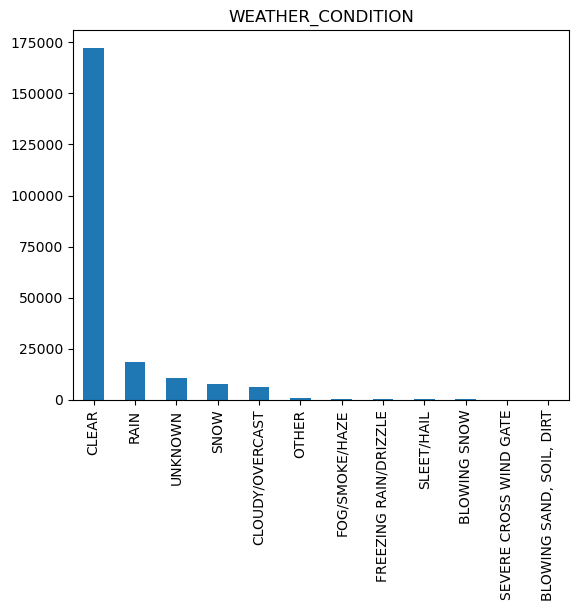

In [41]:
crashes_data.WEATHER_CONDITION .value_counts().plot.bar()
plt.title("WEATHER_CONDITION");

In [42]:
pd.crosstab(crashes_data.WEATHER_CONDITION, people_dataset.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
WEATHER_CONDITION,,,,,
"BLOWING SAND, SOIL, DIRT",0,0,2,0,0
BLOWING SNOW,0,1,97,5,6
CLEAR,125,1827,156207,9265,4927
CLOUDY/OVERCAST,5,60,5697,376,168
FOG/SMOKE/HAZE,0,1,294,13,10
FREEZING RAIN/DRIZZLE,0,4,287,15,11
OTHER,0,4,605,29,15
RAIN,14,189,16607,1036,537
SEVERE CROSS WIND GATE,0,0,39,2,1


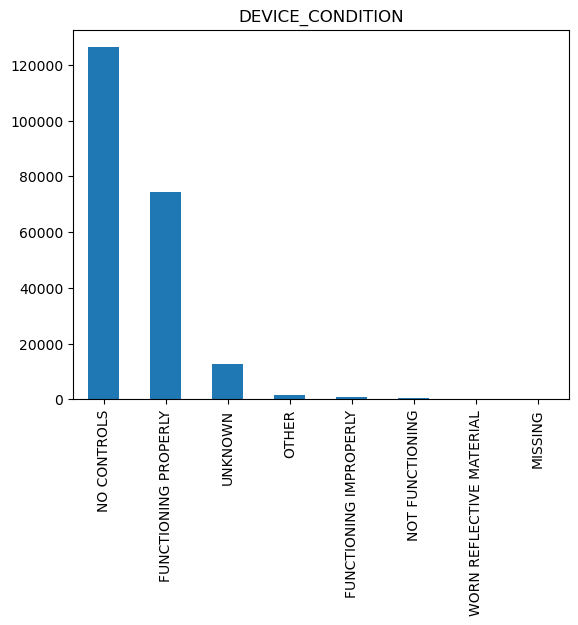

In [43]:

crashes_data.DEVICE_CONDITION.value_counts().plot.bar()
plt.title("DEVICE_CONDITION");

In [44]:
pd.crosstab(crashes_data.DEVICE_CONDITION, people_dataset.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
DEVICE_CONDITION,,,,,
FUNCTIONING IMPROPERLY,1,13,928,65,30
FUNCTIONING PROPERLY,50,771,67433,4080,2146
MISSING,0,0,23,0,0
NO CONTROLS,94,1331,114356,6858,3566
NOT FUNCTIONING,1,6,583,43,14
OTHER,1,17,1408,94,56
UNKNOWN,13,131,11641,650,384
WORN REFLECTIVE MATERIAL,0,1,76,8,2


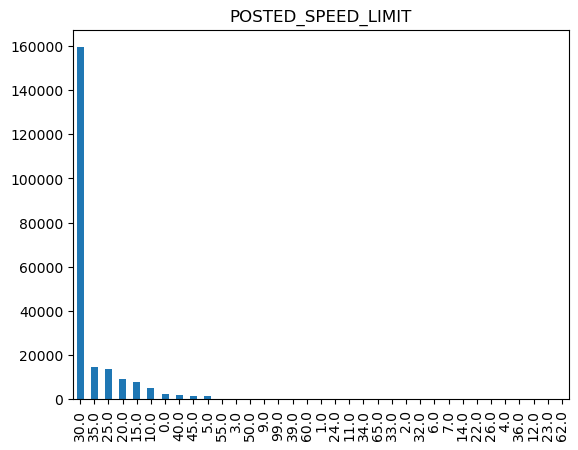

In [45]:
crashes_data.POSTED_SPEED_LIMIT.value_counts().plot.bar()
plt.title("POSTED_SPEED_LIMIT");

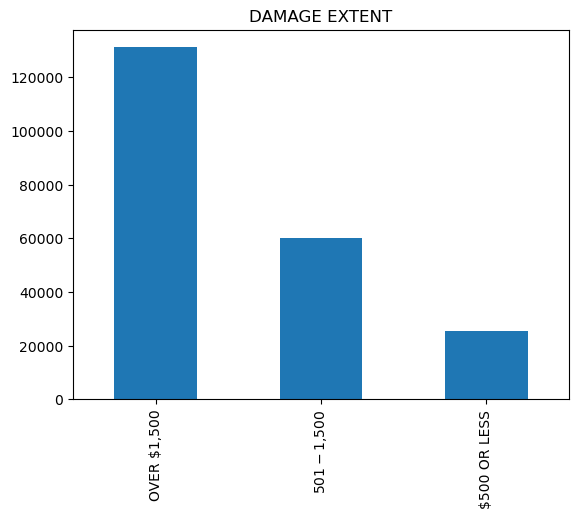

In [46]:
crashes_data.DAMAGE.value_counts().plot.bar()
plt.title("DAMAGE EXTENT");

In [47]:
"""
to avoid colineality we drop the injury columns 
"""

'\nto avoid colineality we drop the injury columns \n'

In [48]:
#crashes_data.drop(['INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
                 # 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
                  #'INJURIES_NO_INDICATION', 'MOST_SEVERE_INJURY'], axis=1)

In [49]:
people_dataset.shape

(1518890, 21)

In [50]:
crashes_data.shape

(216969, 28)

In [51]:
crashes_df = people_dataset.merge(crashes_data, on='CRASH_RECORD_ID', how='left')

In [52]:
crashes_df.shape

(1518890, 48)

In [53]:
crashes_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION',
       'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH'],
      dty

In [67]:
#here we drop the columns that are not relevent to our project objectives
crash_cleaned_df = crashes_df.drop(['DATE_POLICE_NOTIFIED','INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
                        'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
                        'PERSON_ID','PERSON_TYPE','RD_NO','VEHICLE_ID','ZIPCODE', 'STATE', 'CITY',
                                   'CRASH_RECORD_ID', 'CRASH_DATE'], axis=1)

In [68]:
crashes_df['MOST_SEVERE_INJURY'].value_counts()

NO INDICATION OF INJURY     392486
NONINCAPACITATING INJURY     45714
REPORTED, NOT EVIDENT        25775
INCAPACITATING INJURY         9925
FATAL                          615
Name: MOST_SEVERE_INJURY, dtype: int64

# Train and Split

In [73]:
number

,index,0
0,SEX,SEX
1,AGE,AGE
2,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_STATE
3,DRIVERS_LICENSE_CLASS,DRIVERS_LICENSE_CLASS
4,SAFETY_EQUIPMENT,SAFETY_EQUIPMENT
5,AIRBAG_DEPLOYED,AIRBAG_DEPLOYED
6,EJECTION,EJECTION
7,INJURY_CLASSIFICATION,INJURY_CLASSIFICATION
8,DRIVER_ACTION,DRIVER_ACTION
9,DRIVER_VISION,DRIVER_VISION


In [85]:
crash_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518890 entries, 0 to 1518889
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   SEX                      1495127 non-null  object 
 1   AGE                      1077214 non-null  float64
 2   DRIVERS_LICENSE_STATE    892874 non-null   object 
 3   DRIVERS_LICENSE_CLASS    755249 non-null   object 
 4   SAFETY_EQUIPMENT         1514565 non-null  object 
 5   AIRBAG_DEPLOYED          1490197 non-null  object 
 6   EJECTION                 1500352 non-null  object 
 7   INJURY_CLASSIFICATION    1518229 non-null  object 
 8   DRIVER_ACTION            1208818 non-null  object 
 9   DRIVER_VISION            1208378 non-null  object 
 10  PHYSICAL_CONDITION       1209668 non-null  object 
 11  BAC_RESULT               1209833 non-null  object 
 12  POSTED_SPEED_LIMIT       474521 non-null   float64
 13  TRAFFIC_CONTROL_DEVICE   474521 non-null  

In [74]:
crash_cleaned_df

,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,...,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,...,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,1531.0,3.0,NO INDICATION OF INJURY,3.0,7.0,9.0
1,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518885,F,NaN,NaN,NaN,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518886,F,NaN,NaN,NaN,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518887,F,NaN,NaN,NaN,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518888,F,49.0,NaN,NaN,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#defining our presicter from our target variable
X_crashes = crash_cleaned_df.drop(columns = "MOST_SEVERE_INJURY", axis=1)
y_crashes = crash_cleaned_df['MOST_SEVERE_INJURY']

In [83]:
#splitting our data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X_crashes, y_crashes, test_size = 0.2 , random_state = 42)

In [97]:
test_data = X_test, y_test

# Using Pipeline and function Transformer

In [84]:
#will throw this mini pipeline into our column transformer
subpipe_num = Pipeline(steps = [('num_impute', SimpleImputer()),
                               ('ss', StandardScaler())])
subpipe_cat = Pipeline(steps = [('cat_impute', SimpleImputer(strategy='most_frequent')),
                               ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [72]:
number = crash_cleaned_df.columns.to_frame()
number = number.reset_index()

In [86]:
#the remainder "passthrough" will let the compiler to leave 
#the other df column is unchanged
#most of the columns here fall under the cartegorical type
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num,[2,12,26,27,29,30,31]),
                                    ('subpipe_cat', subpipe_cat, [0,1,3,4,5,6,7,8,9,10,11,13,14,15,16,17,
                                                                 18,19,20,21,22,23,24,25,27,28])],
                      remainder= 'passthrough')

In [98]:
#since the column transformer has taken care of the preprocessing,
#we now do a model with the fillowing pipeline 
tree_clf__model_pipe = Pipeline(steps = [('ct', CT),
                                     ('tree_clf', DecisionTreeClassifier(criterion='gini', max_depth=5))])

In [99]:
#now we fit the data into our model for training
tree_clf__model_pipe.fit(X_train, y_train)

ValueError: all features must be in [0, 30] or [-31, 0]

In [95]:
y_train.value_counts().sum()

379595

In [96]:
X_train.sum()

AGE                    32615251.0
POSTED_SPEED_LIMIT     10933341.0
BEAT_OF_OCCURRENCE    466519834.0
NUM_UNITS                792923.0
CRASH_HOUR              5113994.0
CRASH_DAY_OF_WEEK       1572820.0
CRASH_MONTH             2546875.0
dtype: float64

# BASELINE MODEL

In [ ]:
#tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
#tree_clf.fit(X_train, y_train)